In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
values_lipid = pd.read_excel(r'Z:\grodriguez\CardiacOCT\info-files\uncertainty\conf_lipid_calcium.xlsx', sheet_name='Lipid')
values_calcium = pd.read_excel(r'Z:\grodriguez\CardiacOCT\info-files\uncertainty\conf_lipid_calcium.xlsx', sheet_name='Calcium')

In [3]:
def get_entropy(model, region):
    """Get entropy and dice values for TP

    Args:
        model (str): name of the model (which can be seen in the column name of the Excel file)
        region (pd.DataFrame): dataframe with either the lipid or calcium values

    Returns:
        series, series: entropy and dice values
    """    

    entropy = region['entropy {}'.format(model)].dropna()
    dices = region['dice {}'.format(model)].dropna()
    entropy_tp = (-1*entropy[region['type {}'.format(model)] == 'TP']).tolist()
    dices_tp = dices[region['type {}'.format(model)] == 'TP'].tolist()

    return entropy_tp, dices_tp

In [4]:
#Here we generate a new DF with all the info so we can get the violinplots
entropy_2d, dices_2d = get_entropy('2d', values_lipid)
entropy_1, dices_1 = get_entropy('k=1', values_lipid)
entropy_2, dices_2 = get_entropy('k=2', values_lipid)
entropy_3, dices_3 = get_entropy('k=3', values_lipid)

entropy_2d_cal, dices_2d_cal = get_entropy('2d', values_calcium)
entropy_1_cal, dices_1_cal = get_entropy('k=1', values_calcium)
entropy_2_cal, dices_2_cal = get_entropy('k=2', values_calcium)
entropy_3_cal, dices_3_cal = get_entropy('k=3', values_calcium)

type_2d = ['Lipid'] * len(entropy_2d) + ['Calcium'] * len(entropy_2d_cal)
type_1 = ['Lipid'] * len(entropy_1) + ['Calcium'] * len(entropy_1_cal)
type_2 = ['Lipid'] * len(entropy_2) + ['Calcium'] * len(entropy_2_cal)
type_3 = ['Lipid'] * len(entropy_3) + ['Calcium'] * len(entropy_3_cal)

model_2d = ['2D'] * (len(entropy_2d) + len(entropy_2d_cal))
model_1 = ['k = 1'] * (len(entropy_1) + len(entropy_1_cal))
model_2 = ['k = 2'] * (len(entropy_2) + len(entropy_2_cal))
model_3 = ['k = 3'] * (len(entropy_3) + len(entropy_3_cal))

new_df = pd.DataFrame({'Region': type_2d+type_1+type_2+type_3,
                        'Model':model_2d+model_1+model_2+model_3,
                        'Entropy':entropy_2d+entropy_2d_cal+entropy_1+entropy_1_cal+entropy_2+entropy_2_cal+entropy_3+entropy_3_cal,
                        'DICE': dices_2d+dices_2d_cal+dices_1+dices_1_cal+dices_2+dices_2_cal+dices_3+dices_3_cal})

In [5]:
new_df

,Region,Model,Entropy,DICE
0,Lipid,2D,0.145874,0.691097
1,Lipid,2D,0.581055,0.766692
2,Lipid,2D,0.122070,0.869310
3,Lipid,2D,0.213257,0.822760
4,Lipid,2D,0.139893,0.819144
...,...,...,...,...
586,Calcium,k = 3,0.117920,0.877833
587,Calcium,k = 3,0.361572,0.852634
588,Calcium,k = 3,0.366943,0.885781
589,Calcium,k = 3,0.409668,0.957304


C:\Users\gonza\AppData\Local\Temp\ipykernel_4488\3932850651.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_yticklabels(graph.get_yticks(), fontsize=18)


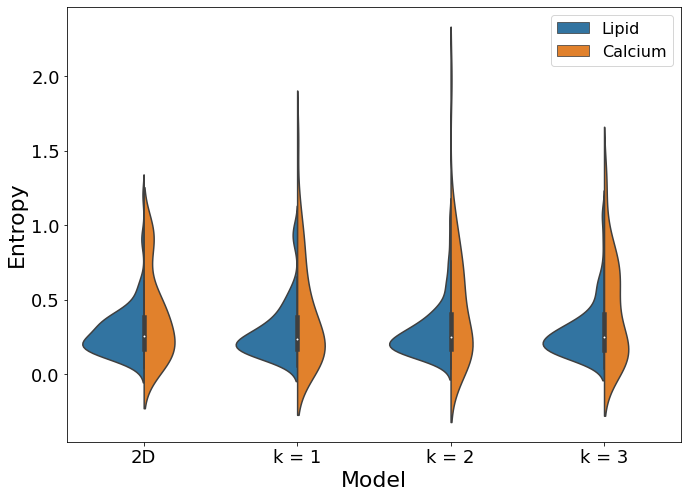

In [7]:
fig, ax = plt.subplots(figsize=(11,8))
graph = sns.violinplot(new_df, x='Model', y='Entropy', hue='Region', orient='v', split=True)
graph.legend(loc='upper right', fontsize=16)
graph.set_xlabel('Model', fontsize=22)
graph.set_ylabel('Entropy', fontsize=22)
graph.set_xticklabels(['2D', 'k = 1', 'k = 2', 'k = 3'], fontsize=18)
graph.set_yticklabels(graph.get_yticks(), fontsize=18)
plt.show()


In [8]:
print('Mean entropy: ', np.mean(entropy_3))
print('Correlation: ', np.corrcoef(entropy_3, dices_3))


Mean entropy:  0.29009710573682596
Correlation:  [[ 1.         -0.48352983]
 [-0.48352983  1.        ]]
